## Convolutional Neural Networks (CNNs)

In this exercise we aim to shed some light on the Convolution Neural Networks by explaining the primary concepts behind CNN such as convolution layers and feature mapping and implement a CNN model to solve the MNIST numbers problem of recognizing numbers from images of handdrawn numbers.

### The basics

We have previously worked with multilayer perceptron models - these operated by having one or more layers of neurons, and a good way to attempt to understand CNN is to compare them to MLP models. In MLP the input is connected to one or more 'hidden' layers with some weights, and each subsequent hidden is connected to a layer before it. MLP layer consists of a one dimensional array of neurons. CNN, much like multilayer perceptrons, operate on layers connected to each other. The primary difference is that CNN models utilize a 2x2 matrix of neurons instead of a 1d array. This makes them much more fitting for tasks such as image recognition, where the input image can easily be represented as a 2d array of pixels.

Another major difference is that in CNN each neuron in a layer is connected to specific subset of last layer called its receptive field. A receptive field is a i x i matrix, and can be thought of as a neurons 'field of vision'. Each neuron performs a convolution operation on its input based on a kernel (filter matrix) of the same size as the receptive fied.

<img align = "middle" src="convolution_layer_geron.png" width="500"/>
  
<figcaption align = "center"><b>Example of convolution layer. The "cone" coming from the top layer is the receptive field of a neuron of size (3x3). </b> <i>A. Geron, Hands on Machine Learning</i></figcaption>



## Using CNN to predict MNIST numbers dataset.

We will now try to create a new CNN model using Keras framework and tweak it to predict the numbers out of an image with high accuracy.



In [49]:
# Methods for downloading and plotting the data

from sklearn.datasets import fetch_openml
import pandas as pd

# mnist 784 dataset has id == 554: https://www.openml.org/search?type=data&status=active&id=554

def MNIST_GetDataSet() -> tuple[pd.DataFrame, pd.Series]:
    X, y = fetch_openml(version="active", data_id=554, return_X_y=True)
    return X, y

%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

X, y_true = MNIST_GetDataSet()
print("OK")

c:\Users\nastr\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


OK


To be able to feed the data into a cnn model, we have to reshape it into 28x28x1 shape, since each image consists of 28x28 pixels. This is because by default the data is flattened and instead of using 28x28 pixels it's shaped as an array with length of 784.

In [50]:
print(X.shape)

# Reshape the data
X_all = X.to_numpy()
X_all = X_all.reshape(70000, 28, 28, 1)
print(X_all.shape)
X_train = X_all[0:60000, :, :, :]
X_test = X_all[60000: 70000, :, :, :]


(70000, 784)
(70000, 28, 28, 1)


The output of the model will have to be a classification of a number between 0 and 9. At this step it is necessary to convert the train/test predictions to one-hot encoded values instead of the strings they are now. 

In [51]:
# This performs 'one-hot encoding'
from keras.utils import to_categorical
# Right now y_true is a vector of string with '0' to '9' in them
print(y_true[0:5])

# Convert the string to an array of 0s and 1s, where the "correct" value is given a 1 and each other value is a 0
y_train = to_categorical(y_true[0:60000])
y_test = to_categorical(y_true[60000:70000])

print(y_train[0:5])



0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Lets train some cnn models to try to categorize the numbers. Additionally, since some of the fitting will take a long time, let's measure how long they take to train as well.

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from pandas import Series
import time

def printAccData(acc : dict[str, float]):
    valid_acc = Series(fittingLogs.history["val_accuracy"])
    print(valid_acc.describe())
    return valid_acc.mean()

# Model 1: 3 layers, kernel size 1x1

model = Sequential([
    Conv2D(16, kernel_size=1, activation='relu', input_shape=(28,28,1)),
    Conv2D(16, kernel_size=1, activation='relu', input_shape=(28,28,1)),
    Conv2D(16, kernel_size=1, activation='relu', input_shape=(28,28,1)),
])

model.add(Flatten())
# Dense() creates connection to the output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
fittingLogs = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
end = time.time()
print("time to fit: ", end-start, "s")
final = end-start
mean1 = printAccData(fittingLogs)
m1_res = Series([mean1, final])



Epoch 1/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7689 - accuracy: 0.8940 - val_loss: 0.3130 - val_accuracy: 0.9094
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3237 - accuracy: 0.9100 - val_loss: 0.3390 - val_accuracy: 0.9128
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3111 - accuracy: 0.9136 - val_loss: 0.3126 - val_accuracy: 0.9138
time to fit:  46.19392228126526 s
count    3.000000
mean     0.912000
std      0.002307
min      0.909400
25%      0.911100
50%      0.912800
75%      0.913300
max      0.913800
dtype: float64


Let's try increasing the kernel size to 3x3.

In [53]:

model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1))),
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(X_train.shape)
print(X_test.shape)
#train the model
start = time.time()
fittingLogs = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
end = time.time()
print("time to fit: ", end-start, "s")
mean2 = printAccData(fittingLogs)

final = end-start
mean2 = printAccData(fittingLogs)
m2_res = Series([mean2, final])




(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/3
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2496 - accuracy: 0.9512 - val_loss: 0.0785 - val_accuracy: 0.9775
Epoch 2/3
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0642 - accuracy: 0.9810 - val_loss: 0.0641 - val_accuracy: 0.9791
Epoch 3/3
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.0668 - val_accuracy: 0.9821
time to fit:  86.1745834350586 s
count    3.000000
mean     0.979567
std      0.002335
min      0.977500
25%      0.978300
50%      0.979100
75%      0.980600
max      0.982100
dtype: float64
count    3.000000
mean     0.979567
std      0.002335
min      0.977500
25%      0.978300
50%      0.979100
75%      0.980600
max      0.982100
dtype: float64


That was a noticable improvement in accuracy! We went from 0.917267 average validation accuracy to 0.977233, although the computation time has rougly doubled. Let's try doubling the filter size.

In [54]:

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1))),
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(X_train.shape)
print(X_test.shape)
#train the model
start = time.time()
fittingLogs = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
end = time.time()
print("time to fit: ", end-start, "s")
mean3 = printAccData(fittingLogs)
final = end-start
m3_res = Series([mean3, final])



(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/3
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1769 - accuracy: 0.9613 - val_loss: 0.0664 - val_accuracy: 0.9788
Epoch 2/3
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch 3/3
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.0784 - val_accuracy: 0.9771
time to fit:  168.18496894836426 s
count    3.000000
mean     0.977967
std      0.000850
min      0.977100
25%      0.977550
50%      0.978000
75%      0.978400
max      0.978800
dtype: float64


Uh oh! Our accuracy has barely improved while the computation time for fitting, has doubled. Clearly adding more filters did not yield a noticable improvement to our model. The average accuracy and time can be shown below.


A useful article about improving the performance of a model can be found here: https://machinelearningmastery.com/improve-deep-learning-performance/

AttributeError: Rectangle.set() got an unexpected keyword argument 'x_labels'

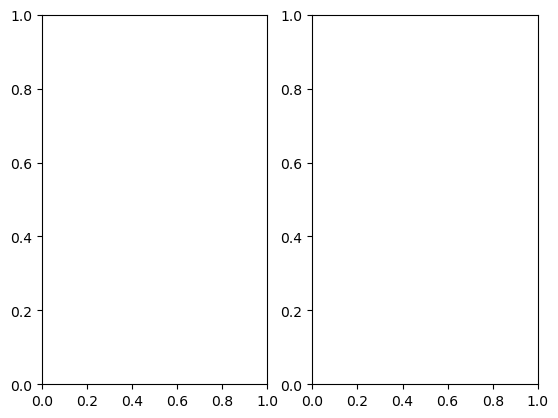

In [86]:
from pandas import DataFrame as df
from matplotlib import pyplot as plt
results_score = Series([m1_res.iloc[0], m2_res.iloc[0], m3_res.iloc[0]])
results_time = Series([m1_res.iloc[1],m2_res.iloc[1], m3_res.iloc[1]])

fig, axes = plt.subplots(1, 2)

x_labels = ["1x1 kernel", "3x3 kernel, 16", "3x3 kernel, 32"]
results_score.plot.bar(ax = axes[0], title="mean accuracy", )
results_time.plot.bar(ax = axes[1], color="green", title="exec time")





